In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

In [2]:
df = pd.read_csv("Sample Media Spend Data.csv")

In [10]:
df

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,2018-01-06,392,422,408,3.498950e+05,73580,12072,682,59417
1,A,2018-01-13,787,904,110,5.062702e+05,11804,9499,853,56806
2,A,2018-01-20,81,970,742,4.300422e+05,52232,17048,759,48715
3,A,2018-01-27,25,575,65,4.177457e+05,78640,10207,942,72047
4,A,2018-02-03,565,284,295,4.085058e+05,40561,5834,658,56235
...,...,...,...,...,...,...,...,...,...,...
3046,Z,2020-02-01,29239,25311,622406,1.459071e+06,45026,12098,53667,82707
3047,Z,2020-02-08,26230,28031,624409,5.342505e+05,227070,9548,53665,84503
3048,Z,2020-02-15,24749,31281,439362,4.227182e+05,393685,9861,55561,147325
3049,Z,2020-02-22,20713,30356,464178,6.085799e+05,424676,10221,49221,111525


## Data preparation

### Data cleansing

In [8]:
# Change data type
df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'], errors='coerce')

In [11]:
# Check and duplicate
df.duplicated().sum()

0

In [13]:
df.drop_duplicates()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,2018-01-06,392,422,408,3.498950e+05,73580,12072,682,59417
1,A,2018-01-13,787,904,110,5.062702e+05,11804,9499,853,56806
2,A,2018-01-20,81,970,742,4.300422e+05,52232,17048,759,48715
3,A,2018-01-27,25,575,65,4.177457e+05,78640,10207,942,72047
4,A,2018-02-03,565,284,295,4.085058e+05,40561,5834,658,56235
...,...,...,...,...,...,...,...,...,...,...
3046,Z,2020-02-01,29239,25311,622406,1.459071e+06,45026,12098,53667,82707
3047,Z,2020-02-08,26230,28031,624409,5.342505e+05,227070,9548,53665,84503
3048,Z,2020-02-15,24749,31281,439362,4.227182e+05,393685,9861,55561,147325
3049,Z,2020-02-22,20713,30356,464178,6.085799e+05,424676,10221,49221,111525


In [36]:
#Check NULL values in data frame
df.isnull().sum()

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64

### Apply lag

In [79]:
for column in df:
    name = '{}_lag'.format(column)
    df[name] = df.groupby('Division')[column].shift(1)

### Other

In [26]:
A_df = df.loc[df['Division']=='A']
B_df = df.loc[df['Division']=='B']

In [68]:
df['Year'] = pd.DatetimeIndex(df['Calendar_Week']).year

In [69]:
df.groupby(['Year','Division']).agg({
    'Paid_Views': sum,
    'Sales': sum
})

Paid_Views     Sales
Year Division                      
2018 A              88974   5009254
     B             415579  43958356
     C              29148   4508423
     D             152144   9694724
     E             210029  23004489
...                   ...       ...
2020 V            1052275   2680138
     W             174684   1027783
     X             160957    881063
     Y              93385    637727
     Z             567965   2651930

[78 rows x 2 columns]

## Data exploration

In [58]:
# Detecting Multicollinearity using VIF
# VIF score of an independent variable represents how well the variable is explained by other independent variables.
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Paid_Views,3.463971
1,Organic_Views,4.026058
2,Google_Impressions,3.956877
3,Email_Impressions,6.392083
4,Facebook_Impressions,2.940434
5,Affiliate_Impressions,4.139994


<AxesSubplot:>

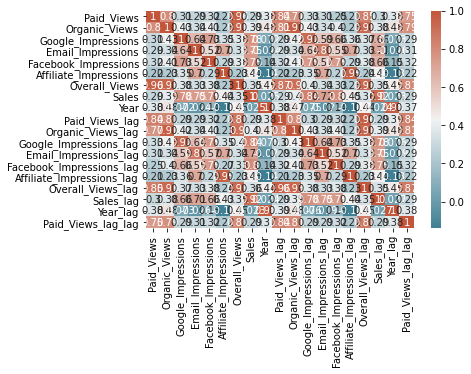

In [82]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

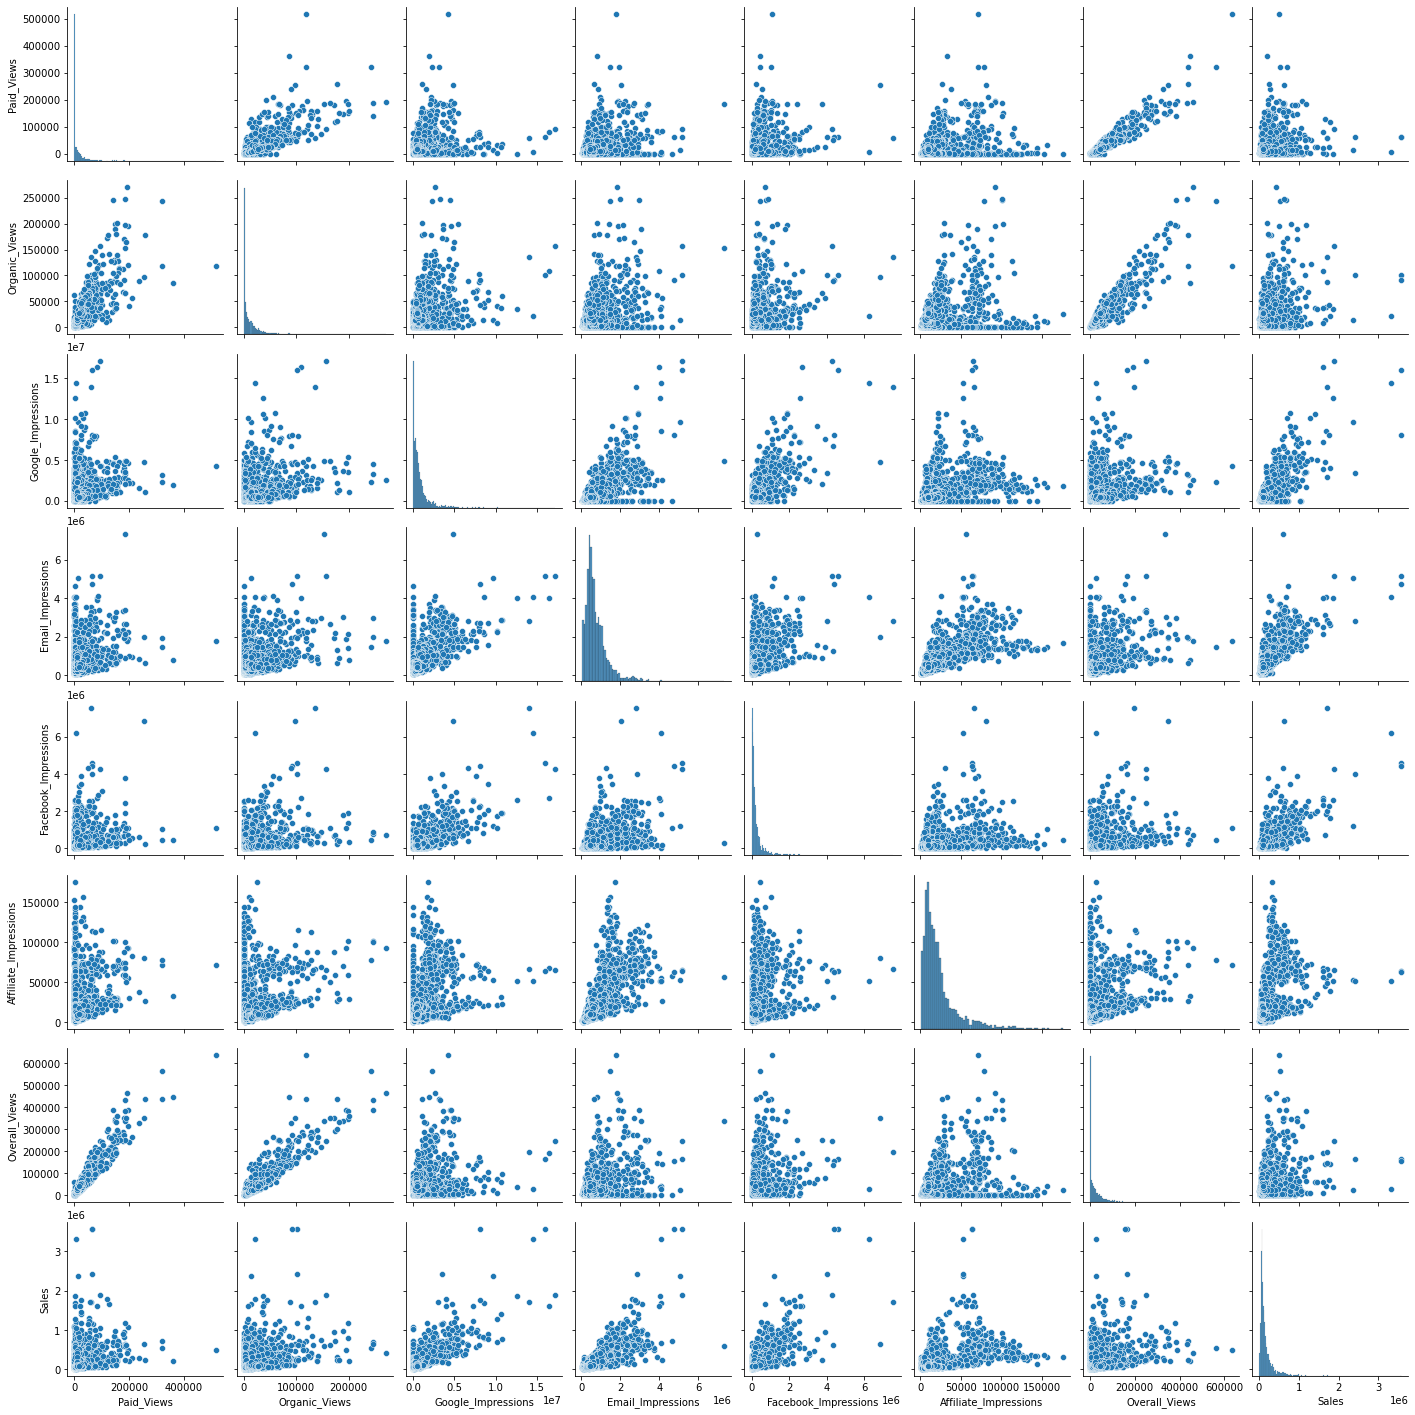

In [60]:
sns.pairplot(df)

In [83]:
corr['Sales'].sort_values(ascending=False)[0:10] #Top 10 

Sales                        1.000000
Sales_lag                    0.916315
Google_Impressions_lag       0.838343
Facebook_Impressions_lag     0.797979
Google_Impressions           0.783338
Facebook_Impressions         0.749133
Email_Impressions            0.746729
Email_Impressions_lag        0.724963
Affiliate_Impressions_lag    0.446256
Affiliate_Impressions        0.440282
Name: Sales, dtype: float64

## Data Modeling

In [44]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Sales~Paid_Views+Organic_Views+Google_Impressions+Email_Impressions+Facebook_Impressions+Affiliate_Impressions", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1720.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:07:58   Log-Likelihood:                -39768.
No. Observations:                3051   AIC:                         7.955e+04
Df Residuals:                    3044   BIC:                         7.959e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -9761.48

In [55]:
# Defining Actual and Predicted values
y_pred = model.predict()
labels = df['Sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()

,Actual,Predicted
0,59417,51762.005377
1,56806,68405.676590
2,48715,58260.805544
3,72047,64961.527003
4,56235,59618.547193


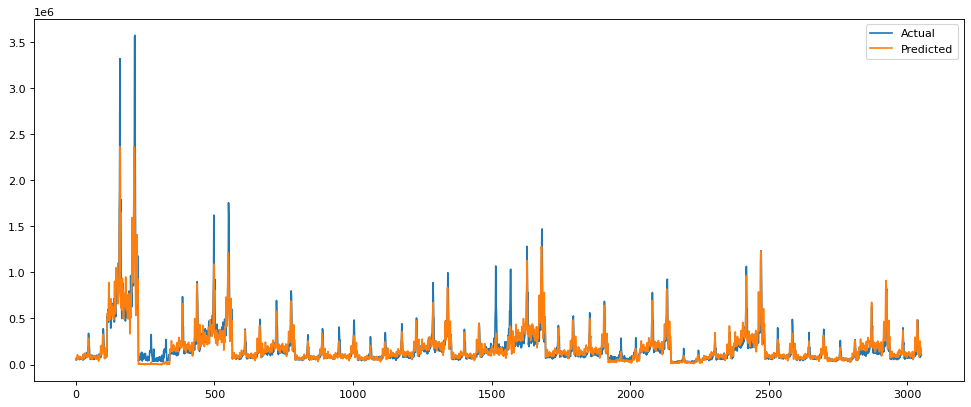

In [56]:
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

In [53]:
# ols_df = pd.concat((model.params, model.tvalues), axis=1)
# ols_df.rename(columns={0: 'coef'}).to_excel('output.xlsx', 'sheet1')

model.params.to_excel('output.xlsx', 'sheet1')